# Data Visualization
* In this lab, we will cover Data Visualization techniques using famous library known as Matplotlib
* Data visualizaiton is essential steps when you want to communicate your findings with your your stakeholders or any other interested parties
* Apart from matplotlib, there are several other Data visualizaton tools/technologies available. However learning matplotlib
  will make your path easier in learning other visualizations tools as well.
* Matplotlib is a widely-used Python library fro creating static, interactive and animated visualizations. It provides a flexible and easy-to-use interfacefor generating various types of plots, charts and graphs.
* Plotting in pandas:
  * Pandas also has built-in implementation via plot()
    * df.plot()
    * Series.plot()
* We will cover:
  * Scatter plot
  * Line plot
  * Bar plot
  * Pie chart
  * Area Chart
  * Violin plot
  * Heatmap
  * Bubble Plot

# Questions that will be answered by data are? 

1. `How does the average satisfaction level change with increasing years of employment?`
2. `How many employees have spent a specific number of years (time spent in the company)?`
3. `What is the distribution of satisfaction levels among employees?`
4. `What is the distribution of work accidents among departments?`
5. `What is the distribution of promotions based on departments?`
6. `How does employee satisfaction vary across different departments?`
7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`
8. `How are the numerical variables correlated with each other?`
9. `How to create different scatter plots under single matplotlib figure?`

In [1]:
# importing pandas and matplotlib and reading csv file using pandas

import matplotlib.pyplot as plt
import pandas as pd
hr_df = pd.read_csv("data/hr_comma_sep.csv")

In [2]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# How does the average satisfaction level change with increasing years of employment?

* Calculating average satisfaction with increasing years of employment

In [4]:
level = hr_df.groupby(["time_spend_company"]).satisfaction_level.mean()
level

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

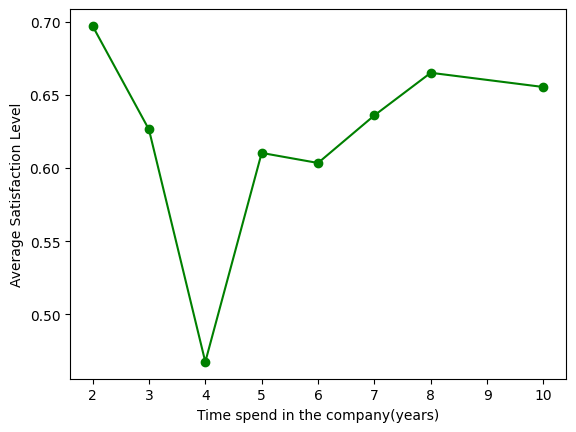

In [5]:
# collection of time in years
time = level.index

# collection of average satisfaction
avg_satis = level.values

# plotting line using matplotlib.pyplot.plot
plt.plot(time, avg_satis, "o-", color="green")

# labeling x and y
plt.xlabel("Time spend in the company(years)")
plt.ylabel("Average Satisfaction Level")

plt.show()

In [6]:
# hr_df.time_spend_company.unique()

In [7]:
# time_spend = hr_df.time_spend_company.unique()
# time_spend = sorted(list(time_spend))
# time_spend

In [8]:
# mean_satis_level = []
# for item in time_spend:
#     mean = hr_df[hr_df["time_spend_company"] == item].satisfaction_level.mean()
#     mean_satis_level.append(round(mean, 2))
# mean_satis_level

# How many employees have spent a specific number of years (time spent in the company)?

### counting the no. of employees who have spent the time in the company ###

In [9]:
to_count = hr_df.groupby(["time_spend_company"]).time_spend_company.value_counts()
to_count

time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: count, dtype: int64

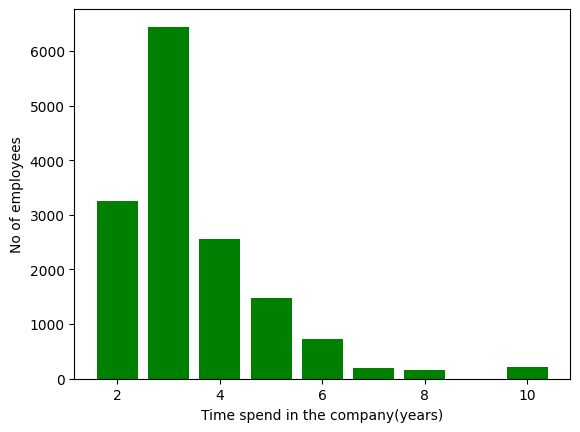

In [10]:
# array of time spending of an employee in a company
time_spend = to_count.index

count = to_count.values

plt.bar(x=time_spend, height=count, color="green")

plt.xlabel("Time spend in the company(years)")
plt.ylabel("No of employees")

plt.show()

# What is the distribution of satisfaction levels among employees?

In [11]:
hr_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


0.6128335222348156 0.64


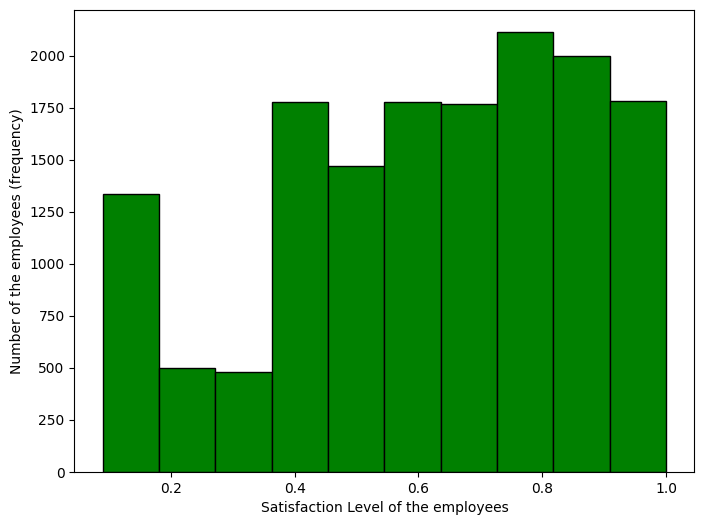

In [12]:
mean = hr_df["satisfaction_level"].mean()
median = hr_df["satisfaction_level"].median()
print(mean, median)

plt.figure(figsize=(8, 6))
plt.hist(hr_df["satisfaction_level"],  color="green", edgecolor="black")
plt.xlabel("Satisfaction Level of the employees")
plt.ylabel("Number of the employees (frequency)")
plt.show()

# What is the distribution of work accidents among departments?

In [13]:
data = hr_df.groupby(["Department"]).Work_accident.value_counts().unstack()
data

Work_accident,0,1
Department,,
IT,1063,164
RandD,653,134
accounting,671,96
hr,650,89
management,527,103
marketing,720,138
product_mng,770,132
sales,3553,587
support,1884,345


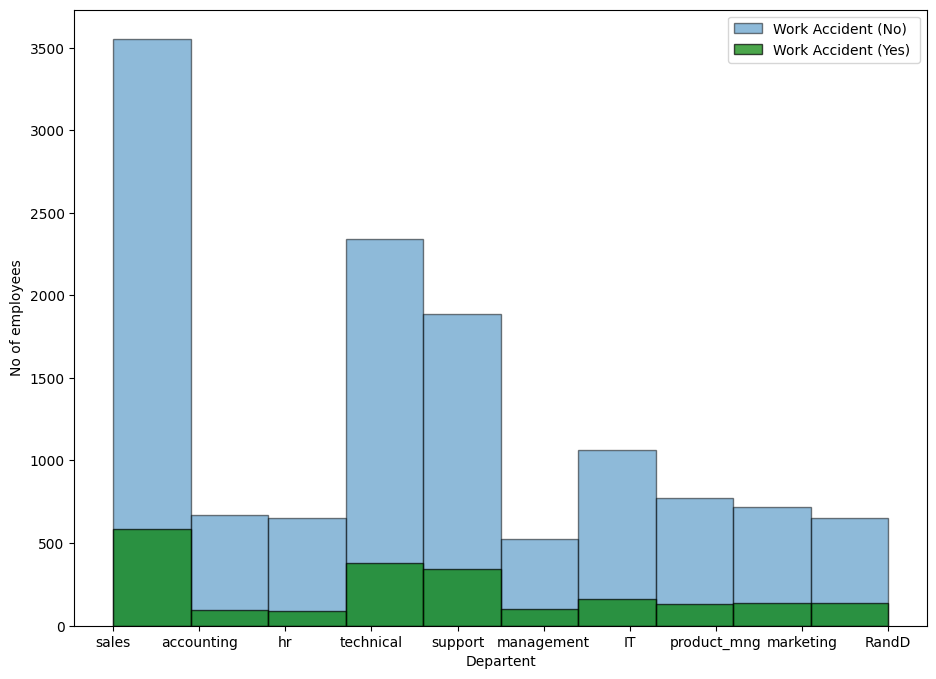

In [14]:
plt.figure(figsize=(11, 8))
plt.hist(hr_df[hr_df["Work_accident"]==0]["Department"], alpha=0.5, edgecolor="black", label="Work Accident (No)")
plt.hist(hr_df[hr_df["Work_accident"]==1]["Department"], color="green", alpha=0.7, edgecolor="black", label="Work Accident (Yes) ")
plt.xlabel("Departent")
plt.ylabel("No of employees")
plt.legend()
plt.show()

# What is the distribution of promotions based on departments?

In [15]:
data = hr_df.groupby(["Department"]).promotion_last_5years.value_counts()
data

Department   promotion_last_5years
IT           0                        1224
             1                           3
RandD        0                         760
             1                          27
accounting   0                         753
             1                          14
hr           0                         724
             1                          15
management   0                         561
             1                          69
marketing    0                         815
             1                          43
product_mng  0                         902
sales        0                        4040
             1                         100
support      0                        2209
             1                          20
technical    0                        2692
             1                          28
Name: count, dtype: int64

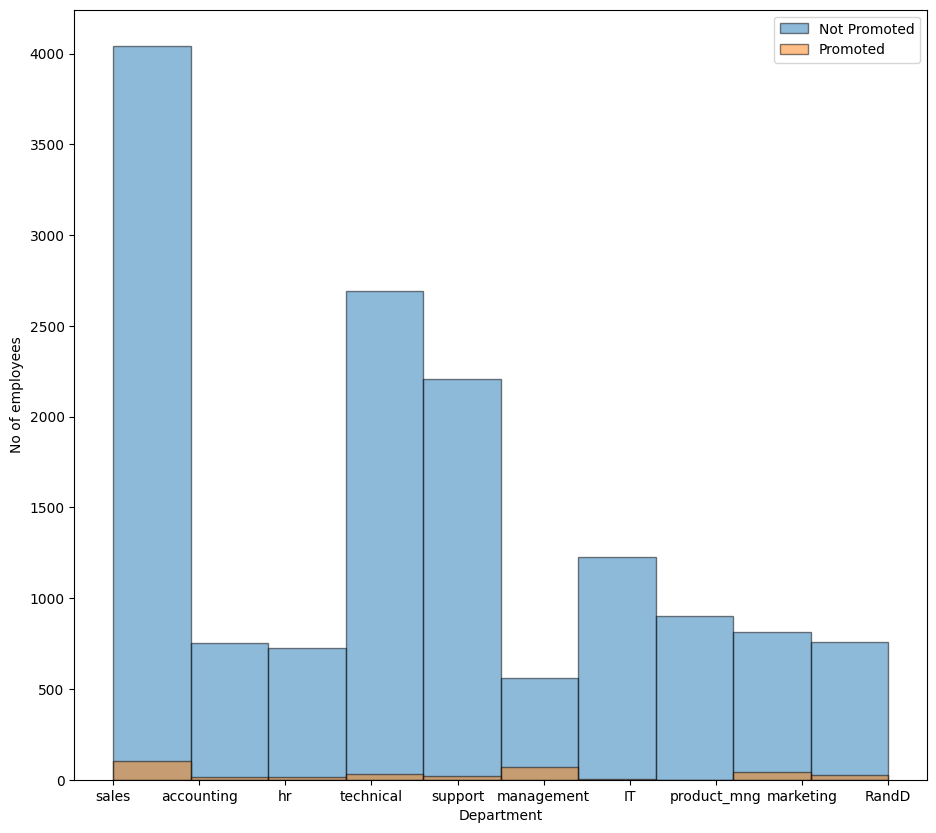

In [16]:
plt.figure(figsize=(11, 10))
data = plt.hist(hr_df[hr_df["promotion_last_5years"]==0]["Department"], alpha=0.5, edgecolor="black", label="Not Promoted")
plt.hist(hr_df[hr_df["promotion_last_5years"]==1]["Department"], alpha=0.5, edgecolor="black", label="Promoted")
plt.xlabel("Department")
plt.ylabel("No of employees")
plt.legend()
plt.show()

# How does employee satisfaction vary across different departments?

In [17]:
data = hr_df.groupby(["Department"]).satisfaction_level.value_counts()
data

Department  satisfaction_level
IT          0.11                  35
            0.10                  34
            0.87                  32
            0.74                  26
            0.66                  25
                                  ..
technical   0.35                   5
            0.26                   5
            0.29                   5
            0.28                   4
            0.47                   3
Name: count, Length: 900, dtype: int64

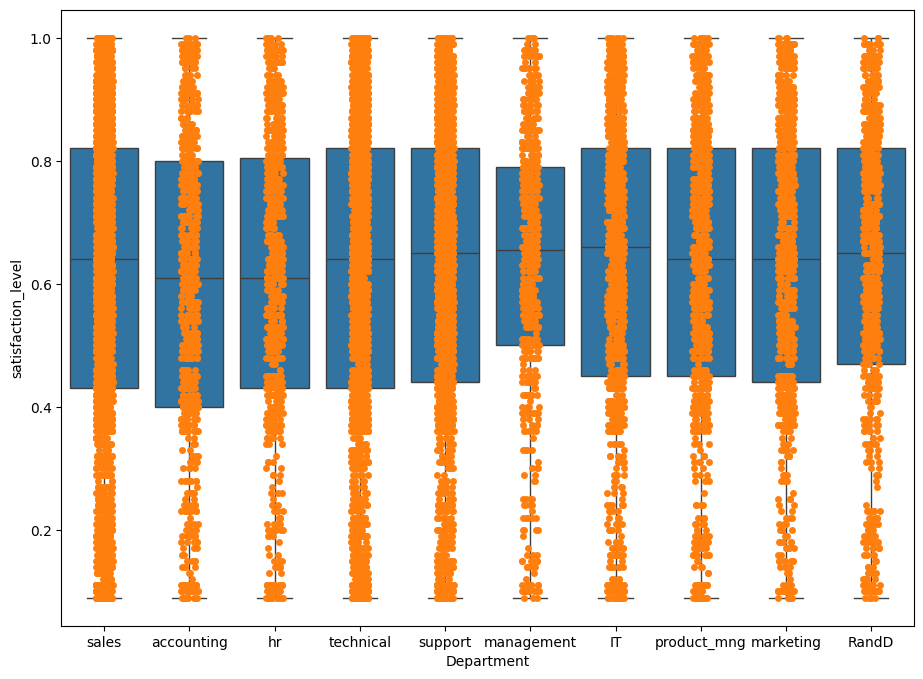

In [42]:
plt.figure(figsize=(11, 8))
sns.boxplot(x="Department", y="satisfaction_level", data=hr_df)
sns.stripplot(x="Department", y="satisfaction_level", data=hr_df)
plt.show()
# sns.boxplot([hr_df[hr_df["Department"]==dept]["satisfaction_level"] for dept in department])

# Figure out employee leaving status (time_spend vs satisfaction_level vs left?

# How are the numerical variables correlated with each other?

# How to create different scatter plots under single matplotlib figure?

In [19]:
data = hr_df["time_spend_company"].value_counts()

<BarContainer object of 8 artists>

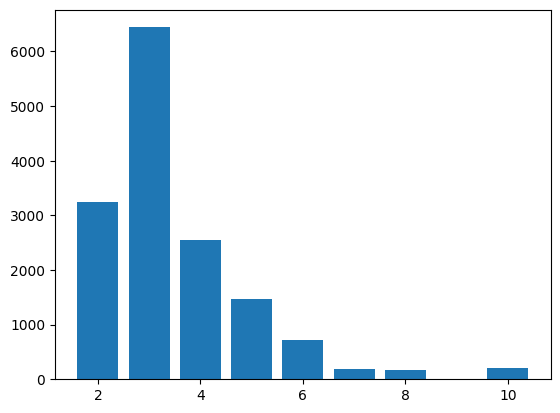

In [20]:
plt.bar(data.index, data.values)

In [21]:
import pandas as pd
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SatisfactionLevel': [0.8, 0.6, 0.7, 0.9, 0.5, 0.6, 0.8, 0.7, 0.4, 0.7]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,EmployeeID,SatisfactionLevel
0,1,0.8
1,2,0.6
2,3,0.7
3,4,0.9
4,5,0.5
5,6,0.6
6,7,0.8
7,8,0.7
8,9,0.4
9,10,0.7


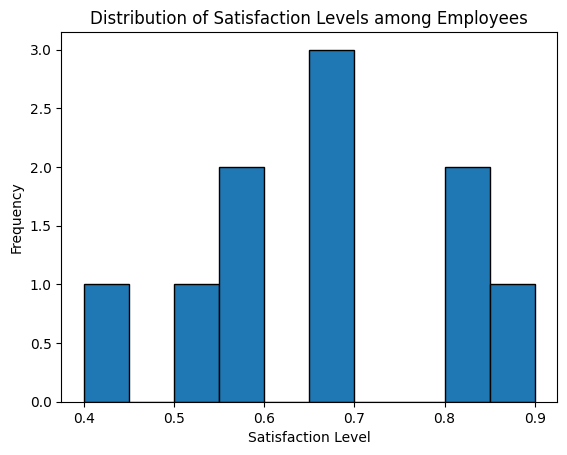

In [22]:
# Plot histogram of satisfaction levels
plt.hist(df['SatisfactionLevel'], bins=10, edgecolor='black')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Levels among Employees')
plt.show()

In [23]:
import numpy as np
data = np.random.randn(1000, 3)
list(data)

[array([-0.68247117,  1.6661095 , -1.48372559]),
 array([ 0.62363728, -0.00596509, -0.15783539]),
 array([-0.15190559,  2.89330855,  0.84674434]),
 array([ 0.79928963,  0.72611953, -0.0652169 ]),
 array([0.35332622, 0.06881049, 0.00287791]),
 array([ 1.00862473, -0.75414642, -1.02254004]),
 array([-0.96870874, -0.87279092,  0.71848334]),
 array([-2.09054915,  0.63263919,  0.99522979]),
 array([ 0.8443474 ,  0.82926608, -0.42760791]),
 array([ 1.99740689, -1.65585518,  0.55919041]),
 array([1.35160657, 0.3854524 , 0.94867897]),
 array([ 0.36471673, -0.03212252, -1.0767692 ]),
 array([ 0.60489946,  2.03068635, -0.40075924]),
 array([-0.51802932, -0.81985424, -0.15638153]),
 array([-0.06569926,  0.20552816,  0.38707524]),
 array([0.84159   , 0.54832031, 1.64150025]),
 array([ 0.54880699, -1.04179794, -0.94805269]),
 array([ 1.77998981, -1.0323243 ,  0.73953692]),
 array([ 1.09932958, -1.28822065, -0.04915517]),
 array([ 0.84803126,  0.76712891, -0.48725225]),
 array([-0.5402052 , -0.31412

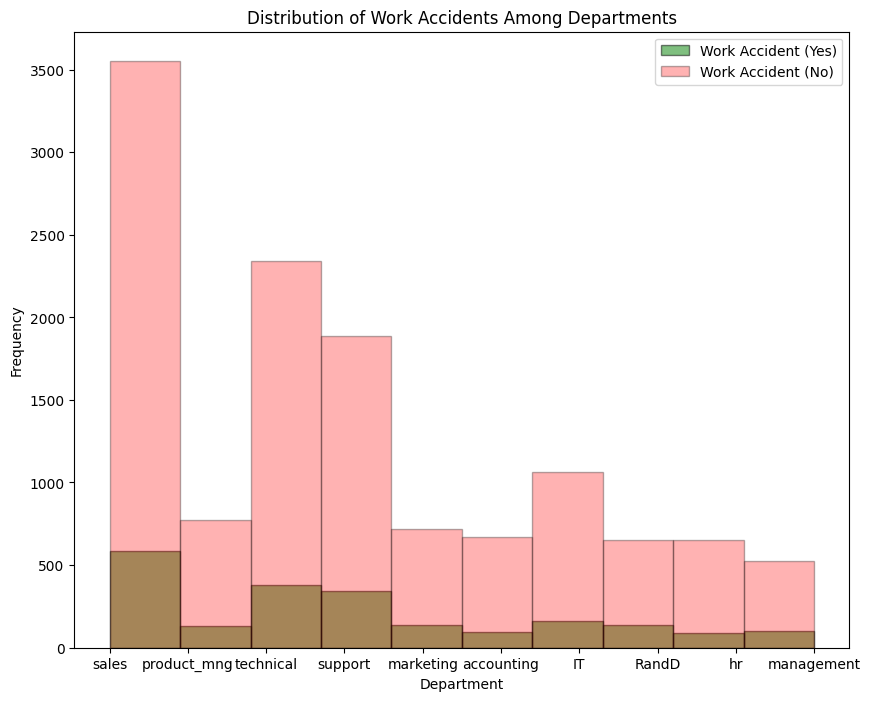

In [24]:

# Plot histogram
plt.figure(figsize=(10, 8))
plt.hist(hr_df[hr_df['Work_accident'] == 1]['Department'], alpha=0.5, label='Work Accident (Yes)', color="green", edgecolor="black")
plt.hist(hr_df[hr_df['Work_accident'] == 0]['Department'], alpha=0.3, label='Work Accident (No)', color="red", edgecolor="black")
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Distribution of Work Accidents Among Departments')
plt.legend()
plt.show()


In [25]:
data = hr_df.groupby(["Department", "Work_accident"]).Work_accident.value_counts()
data
# data.melt(id_vars="Department", var_name="Word_accident", value_name="count")
# sns.barplot(data=data, x="Work_accident", y=")

Department   Work_accident
IT           0                1063
             1                 164
RandD        0                 653
             1                 134
accounting   0                 671
             1                  96
hr           0                 650
             1                  89
management   0                 527
             1                 103
marketing    0                 720
             1                 138
product_mng  0                 770
             1                 132
sales        0                3553
             1                 587
support      0                1884
             1                 345
technical    0                2339
             1                 381
Name: count, dtype: int64

In [26]:
hr_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [27]:
not_acci = hr_df[hr_df["Work_accident"]==0].Department.value_counts()
acci = hr_df[hr_df["Work_accident"]==1].Department.value_counts()
not_acci.values, acci.values

(array([3553, 2339, 1884, 1063,  770,  720,  671,  653,  650,  527],
       dtype=int64),
 array([587, 381, 345, 164, 138, 134, 132, 103,  96,  89], dtype=int64))

In [28]:
# plt.bar(acci.index, [not_acci, acci])

In [29]:
list(acci.index)

['sales',
 'technical',
 'support',
 'IT',
 'marketing',
 'RandD',
 'product_mng',
 'management',
 'accounting',
 'hr']

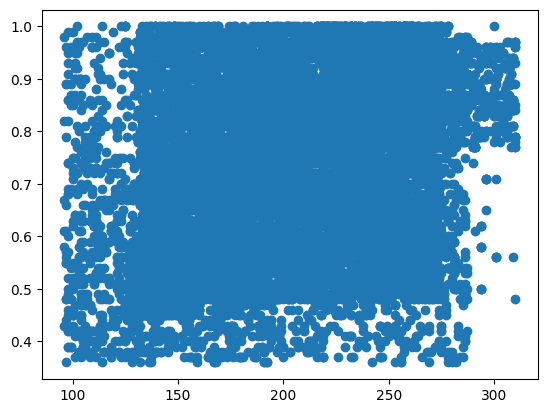

In [30]:
plt.scatter(hr_df["average_montly_hours"], hr_df["last_evaluation"])

    Department  Work_accident_0  Work_accident_1
0           IT             1063              164
1        RandD              653              134
2   accounting              671               96
3           hr              650               89
4   management              527              103
5    marketing              720              138
6  product_mng              770              132
7        sales             3553              587
8      support             1884              345
9    technical             2339              381
     Department    Work_accident  Count
0            IT  Work_accident_0   1063
1         RandD  Work_accident_0    653
2    accounting  Work_accident_0    671
3            hr  Work_accident_0    650
4    management  Work_accident_0    527
5     marketing  Work_accident_0    720
6   product_mng  Work_accident_0    770
7         sales  Work_accident_0   3553
8       support  Work_accident_0   1884
9     technical  Work_accident_0   2339
10           IT  Work

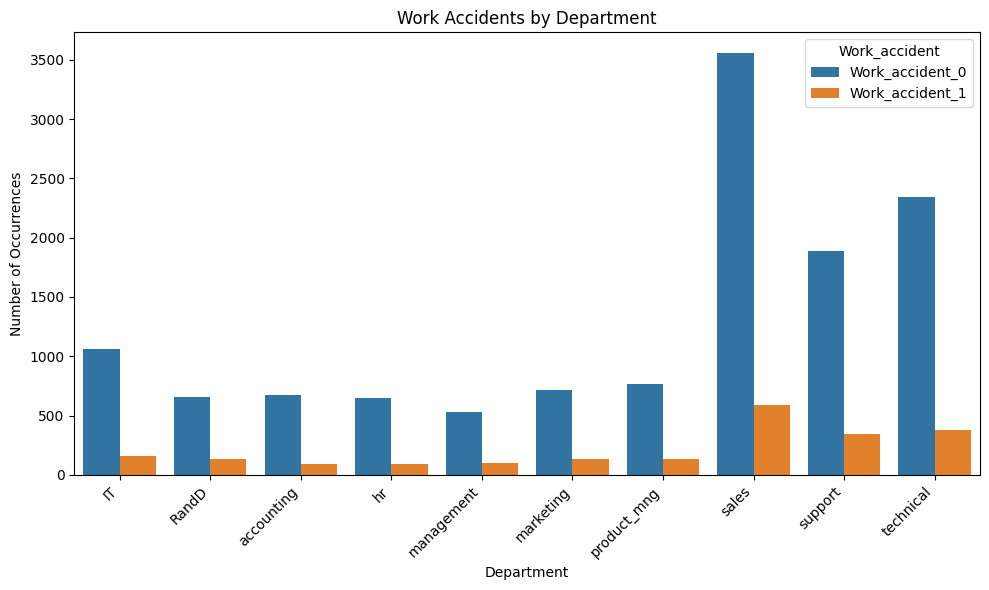

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'Department': ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'],
    'Work_accident_0': [1063, 653, 671, 650, 527, 720, 770, 3553, 1884, 2339],
    'Work_accident_1': [164, 134, 96, 89, 103, 138, 132, 587, 345, 381]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)
# Reshape the DataFrame for plotting
df_melted = df.melt(id_vars='Department', var_name='Work_accident', value_name='Count')
print(df_melted)
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Department', y='Count', hue='Work_accident')
plt.xlabel('Department')
plt.ylabel('Number of Occurrences')
plt.title('Work Accidents by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


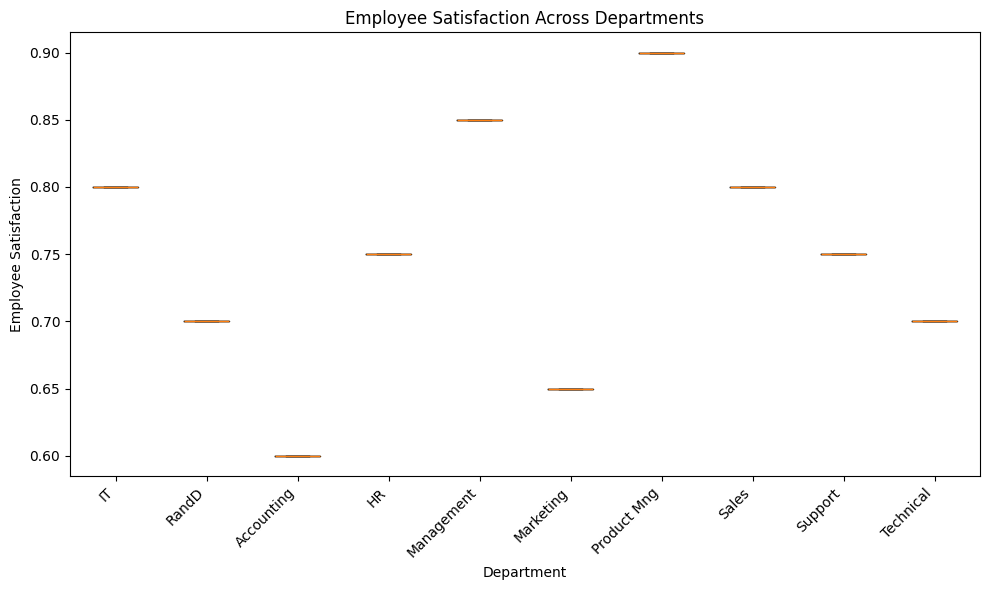

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'Department': ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing', 'Product Mng', 'Sales', 'Support', 'Technical'],
    'Satisfaction': [0.8, 0.7, 0.6, 0.75, 0.85, 0.65, 0.9, 0.8, 0.75, 0.7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Department'] == dept]['Satisfaction'] for dept in df['Department']], labels=df['Department'])
plt.xlabel('Department')
plt.ylabel('Employee Satisfaction')
plt.title('Employee Satisfaction Across Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
